**Tiền xử lý dữ liệu**

***Gọi các thư viện***

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (18, 10)

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import missingno as msno
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
import pandas as pd
import warnings



pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

***Đọc file dữ liệu***

In [2]:
# đọc dữ liệu
data = pd.read_excel("D:\\ML\\bt-hoc-kgs\\USA_Housing.xlsx")

# in ra 5 dòng đầu tiên của dữ liệu
data.head()

,Area Income,Area House Age,Area Number of Rooms,Area Number of Bedrooms,Area Population,Price,Address
0,79545,6,7,4,23087,1059034,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79249,6,7,3,40173,1505891,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287,6,9,5,36882,1058988,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345,7,6,3,34310,1260617,USS Barnett\nFPO AP 44820
4,59982,5,8,4,26354,630943,USNS Raymond\nFPO AE 09386


In [3]:
# tóm tắt thông tin dữ liệu
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Area Income              5000 non-null   int64 
 1   Area House Age           5000 non-null   int64 
 2   Area Number of Rooms     5000 non-null   int64 
 3   Area Number of Bedrooms  5000 non-null   int64 
 4   Area Population          5000 non-null   int64 
 5   Price                    5000 non-null   int64 
 6   Address                  5000 non-null   object
dtypes: int64(6), object(1)
memory usage: 273.6+ KB


In [4]:
# kiểm tra hàng và cột của dữ liệu
data.shape

(5000, 7)

In [5]:
# dữ liệu chứa những cột dữ liệu gì
data.columns

Index(['Area Income', 'Area House Age', 'Area Number of Rooms',
       'Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

***Làm sạch dữ liệu***

- kiểm tra dữ liệu thiếu

In [6]:
# kiểm tra dữ liệu có giá trị null
data.isnull().sum()

Area Income                0
Area House Age             0
Area Number of Rooms       0
Area Number of Bedrooms    0
Area Population            0
Price                      0
Address                    0
dtype: int64

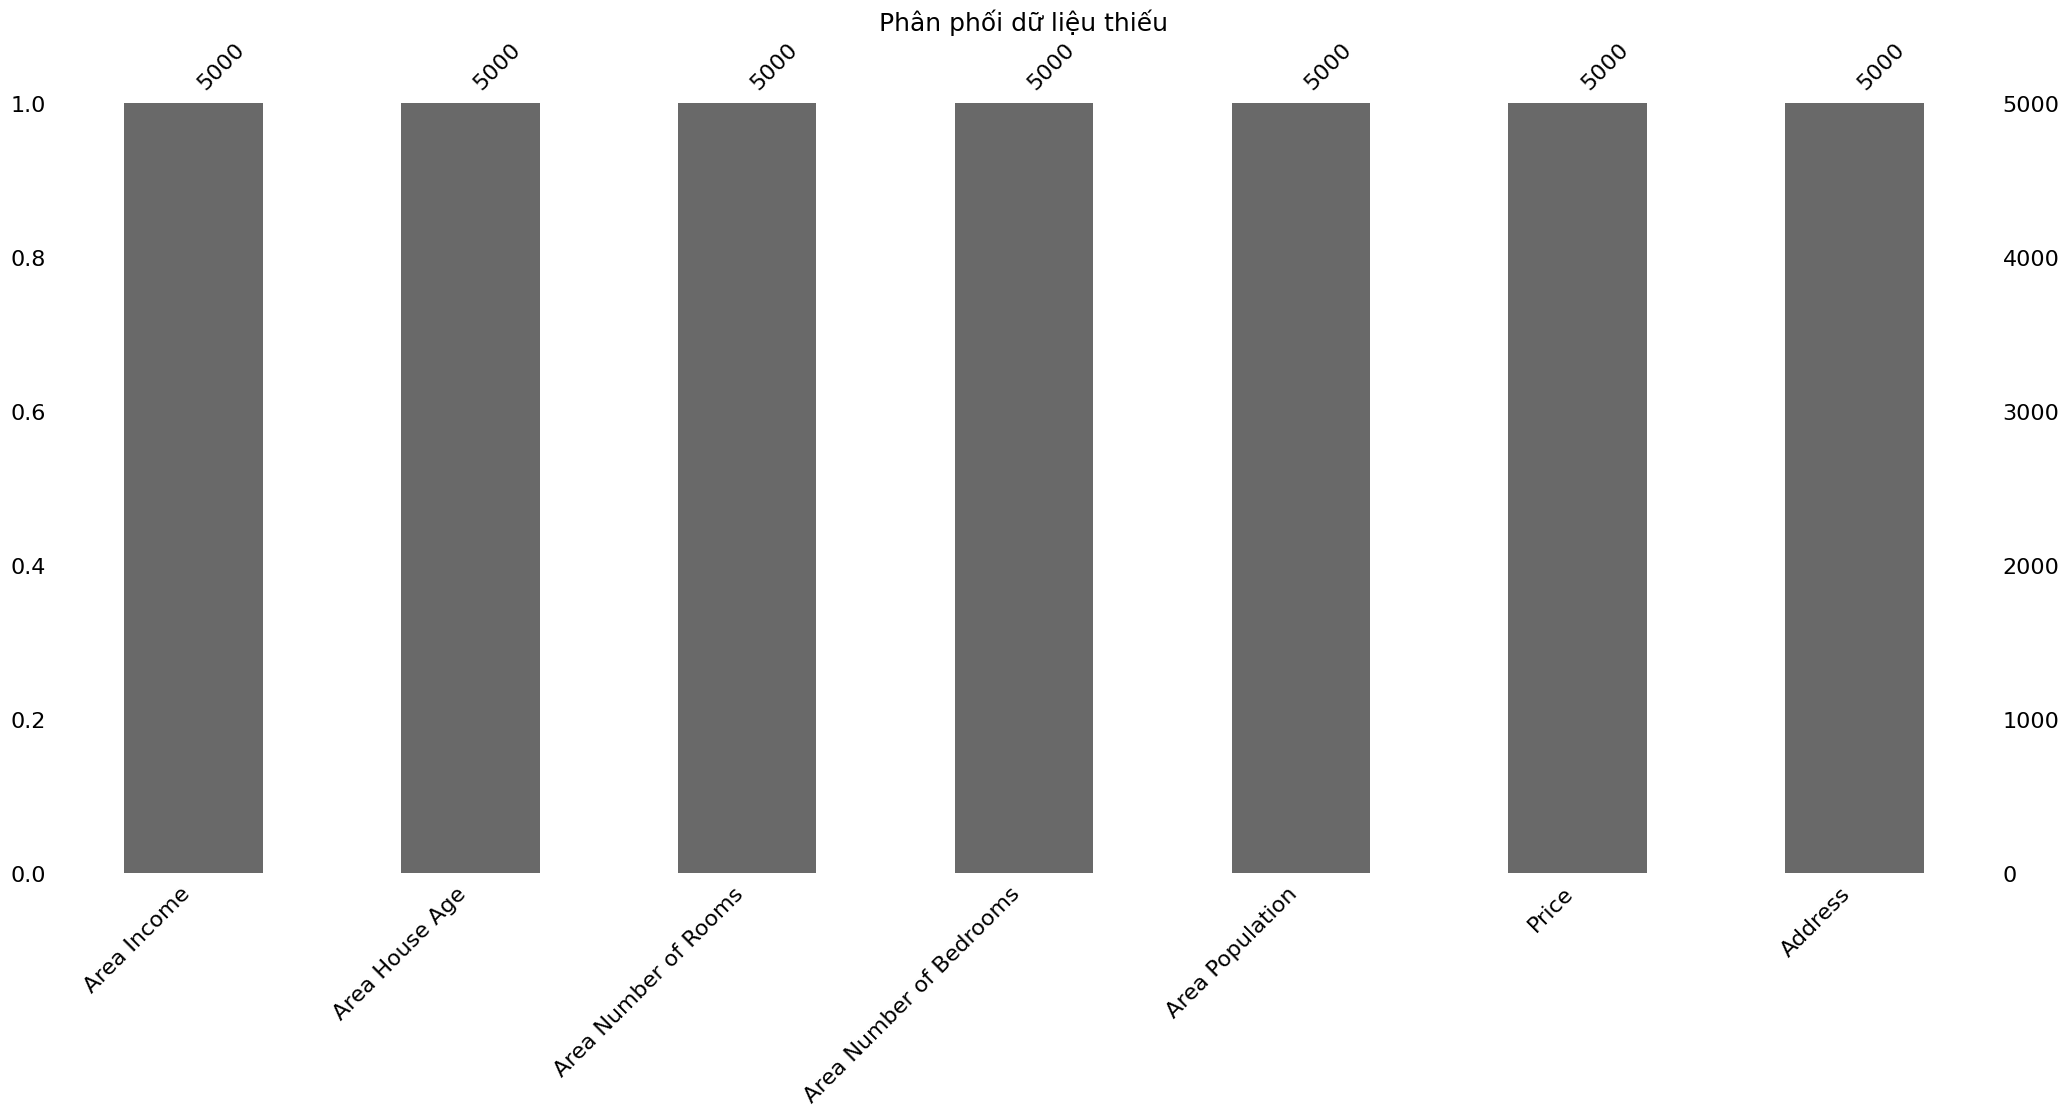

In [7]:
msno.bar(data)
plt.title("Phân phối dữ liệu thiếu", fontsize = 18)
plt.show()

- kiểm tra dữ liệu lặp

In [8]:
# kiểm tra giá trị trùng lặp trong dữ liệu
data.duplicated().sum()

0

In [9]:
# Xác định các hàng trùng lặp
duplicated_rows = data.duplicated()

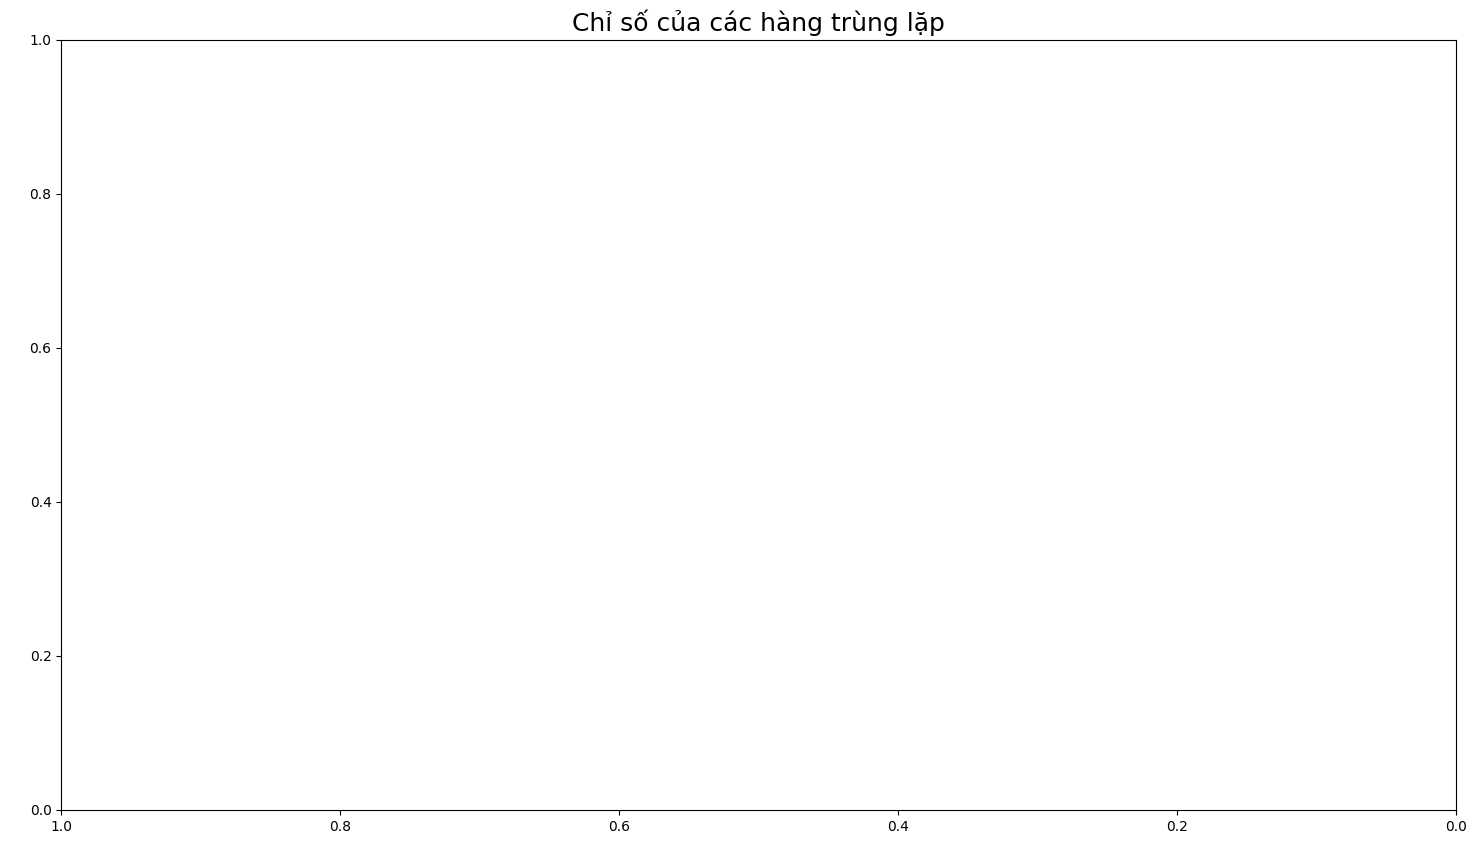

In [10]:
# Tạo một DataFrame mới để lưu số thứ tự của hàng và xác định liệu chúng có bị trùng lặp không
duplicates_data = pd.DataFrame({
    'Row': range(1, len(data) + 1),
    'Duplicated': duplicated_rows
})

# Lọc ra chỉ các hàng đã trùng lặp
duplicates_data = duplicates_data[duplicates_data['Duplicated']]

# Vẽ chúng dưới dạng đường thẳng màu đen
plt.figure(figsize=(18, 10))
plt.vlines(x=duplicates_data['Row'], ymin=0, ymax=1, color='black')
plt.gca().invert_xaxis() # Đảo ngược trục x
plt.title("Chỉ số của các hàng trùng lặp", fontsize = 18)
plt.xlabel(" ")
plt.ylabel(" ")
plt.show()

- xử lý dữ liệu nhiễu

In [11]:
data.describe()

,Area Income,Area House Age,Area Number of Rooms,Area Number of Bedrooms,Area Population,Price
count,5000.000,5000.000,5000.000,5000.000,5000.000,5000.000
mean,68583.104,5.975,6.988,3.753,36163.512,1232072.658
std,10657.990,1.038,1.044,1.233,9925.651,353117.625
min,17797.000,3.000,3.000,2.000,173.000,15939.000
25%,61480.500,5.000,6.000,3.000,29404.000,997577.500
50%,68804.500,6.000,7.000,4.000,36199.000,1232669.000
75%,75783.000,7.000,8.000,4.000,42861.000,1471210.000
max,107702.000,10.000,11.000,7.000,69622.000,2469066.000


In [12]:
min_thresold, max_thresold = data.Price.quantile([0.001, 0.999])
min_thresold, max_thresold

(152071.455, 2298398.907000004)

In [13]:
data[data.Price < min_thresold]

,Area Income,Area House Age,Area Number of Rooms,Area Number of Bedrooms,Area Population,Price,Address
1271,37971,4,6,3,33268,31141,"98398 Terrance Pines\nSouth Joshua, MT 00544-8919"
1459,35963,3,8,3,24436,143027,"166 Terry Grove\nSouth Michaelhaven, PR 18054"
1661,48736,6,6,2,19682,151527,"3426 Vicki Track\nLake Rebeccashire, TN 53858"
1799,60168,5,4,4,16811,88592,"97009 Annette Vista\nMichaelside, AZ 39867"
3212,47321,4,7,3,15777,15939,"91410 Megan Camp Suite 360\nLaurafort, OH 15735"


In [14]:
data[data.Price > max_thresold]

,Area Income,Area House Age,Area Number of Rooms,Area Number of Bedrooms,Area Population,Price,Address
465,90592,8,10,5,37224,2469066,USNS Vargas\nFPO AE 56319-6904
693,107702,7,9,3,37619,2332111,"41017 Eric Village\nJonathanport, CO 37205"
924,83814,9,7,3,51538,2330290,"125 Gillespie Plain\nWhitefurt, MO 18599"
1248,94734,8,7,5,46315,2318286,"4393 James Springs Apt. 818\nMargaretview, ND ..."
2719,101600,8,7,6,37524,2370231,"52280 Steven Street\nRobertchester, IA 40405-0504"


xóa outlines

In [15]:
data_clean = data[(data.Price < max_thresold) & (data.Price > min_thresold)]
data_clean.shape

(4990, 7)

In [16]:
data_clean.describe()

,Area Income,Area House Age,Area Number of Rooms,Area Number of Bedrooms,Area Population,Price
count,4990.000,4990.000,4990.000,4990.000,4990.000,4990.000
mean,68578.541,5.974,6.988,3.753,36171.817,1232086.790
std,10603.284,1.035,1.043,1.233,9919.921,349764.874
min,17797.000,3.000,3.000,2.000,173.000,152072.000
25%,61483.750,5.000,6.000,3.000,29409.000,998356.250
50%,68804.500,6.000,7.000,4.000,36199.000,1232669.000
75%,75773.250,7.000,8.000,4.000,42869.000,1470262.250
max,104703.000,10.000,11.000,7.000,69622.000,2298379.000


*Chuẩn hóa dữ liệu*

- Đánh giá từng thuộc tính độc lập

In [66]:
def summarize_dataframe(clean_data):

    # In ra số lượng bản ghi và cột
    print(f"\nCó {len(data_clean)} bản ghi và {len(data_clean.columns)} thuộc tính/cột")

    # Xác định các thuộc tính số học
    numeric_features = data_clean.select_dtypes(include=[np.number]).columns.tolist()

    # Xác định các thuộc tính phân loại
    categorical_features = data_clean.select_dtypes(exclude=[np.number]).columns.tolist()

    # In ra số lượng thuộc tính số học và từng thuộc tính
    print(f"\nCó {len(numeric_features)} thuộc tính numeric: \n")
    for i, feature in enumerate(numeric_features, 1):
        print(f"{i}. {feature}\n")

        # In ra số lượng thuộc tính phân loại và từng thuộc tính
    print(f"\nCó {len(categorical_features)} thuộc tính categorical:\n")
    for i, feature in enumerate(categorical_features, 1):
            print(f"{i}. {feature} \n")
            
summarize_dataframe(data_clean)


Có 4990 bản ghi và 7 thuộc tính/cột

Có 7 thuộc tính numeric: 

1. Area Income

2. Area House Age

3. Area Number of Rooms

4. Area Number of Bedrooms

5. Area Population

6. Price

7. Address


Có 0 thuộc tính categorical:



-Thực hiện phương pháp chuẩn hóa dữ liệu bằng phương pháp min-max scaling

In [120]:
from sklearn.preprocessing import MinMaxScaler

# Tạo một đối tượng MinMaxScaler
scaler = MinMaxScaler()

# Chọn các cột cần chuẩn hóa
columns_to_scale = ['Area Income', 'Area House Age', 'Area Number of Rooms', 'Area Number of Bedrooms', 'Area Population', 'Price']

# Chuẩn hóa Min-Max
data_clean[columns_to_scale] = scaler.fit_transform(data_clean[columns_to_scale])


- Xuất dữ liệu bằng file xlsx với 500 dòng dữ liệu đầu tiên

In [123]:
data_clean.to_excel('D:\\ML\\bt-hoc-kgs\\USA_Housing_da_xu_ly.xlsx', index=True)